In [2]:
import pandas as pd
import json # Importa a biblioteca json para garantir a formatação correta

# >>> MUDANÇA AQUI: Atualiza o caminho do arquivo Excel <<<
caminho_novo_arquivo_excel = '/content/Mega-Sena.xlsx'

caminho_arquivo_json = '/content/sorteios_mega_sena.json' # Renomeado para .json, pois o conteúdo será JSON
colunas_para_formatar = ['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']

try:
    df_sorteios = pd.read_excel(caminho_novo_arquivo_excel)

    # Lista para armazenar os arrays de números de cada sorteio
    dados_sorteios = []

    for index, row in df_sorteios.iterrows():
        # Extrai os 6 números do sorteio, convertendo para int
        numeros_do_sorteio = [int(row[col]) for col in colunas_para_formatar]
        dados_sorteios.append(numeros_do_sorteio)

    # Escreve a lista completa de sorteios no arquivo JSON
    # A função json.dump() se encarrega de formatar tudo corretamente
    with open(caminho_arquivo_json, 'w', encoding='utf-8') as arquivo_json:
        json.dump(dados_sorteios, arquivo_json, indent=4) # indent=4 para deixar o JSON legível

    print(f"Os dados formatados no padrão JSON foram salvos em '{caminho_arquivo_json}'.")

except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_novo_arquivo_excel}' não foi encontrado.")
except KeyError as ke:
    print(f"Erro: Uma ou mais colunas especificadas ({colunas_para_formatar}) não foram encontradas no arquivo Excel. Detalhes: {ke}")
except Exception as e:
    print(f"Ocorreu um erro ao processar o arquivo: {e}")

Os dados formatados no padrão JSON foram salvos em '/content/sorteios_mega_sena.json'.


In [5]:
import json
import pandas as pd

try:
    # Carrega os dados do arquivo JSON
    with open('/content/sorteios_mega_sena.json', 'r') as f:
        dados_json = json.load(f)

    # Converte para DataFrame
    df = pd.DataFrame(dados_json)

    # Imprime os nomes das colunas encontradas
    print("--- Nomes das Colunas Encontradas ---")
    print(df.columns)

    # Imprime as 5 primeiras linhas para vermos a estrutura dos dados
    print("\n--- Amostra dos Dados (5 primeiras linhas) ---")
    print(df.head())

except Exception as e:
    print(f"Ocorreu um erro ao tentar ler o arquivo: {e}")

--- Nomes das Colunas Encontradas ---
RangeIndex(start=0, stop=6, step=1)

--- Amostra dos Dados (5 primeiras linhas) ---
    0   1   2   3   4   5
0   4   5  30  33  41  52
1   9  37  39  41  43  49
2  10  11  29  30  36  47
3   1   5   6  27  42  59
4   1   2   6  16  19  46


--- Análise de Combinações Pares e Ímpares ---
As combinações que mais ocorreram foram:
   pares  impares  ocorrencias
3      3        3          890
4      4        2          700
2      2        4          695
5      5        1          270
1      1        5          256
0      0        6           37
6      6        0           36

> Gráfico 'combinacao_pares_impares.png' salvo com sucesso.

--- Frequência de Sorteio de Cada Número (1 a 60) ---
1     282
2     291
3     267
4     304
5     318
6     290
7     271
8     284
9     270
10    337
11    303
12    273
13    297
14    278
15    256
16    299
17    306
18    275
19    281
20    283
21    240
22    258
23    302
24    287
25    288
26    237
27    302
28    296
29    288
30    303
31    269
32    306
33    309
34    314
35    302
36    290
37    310
38    308
39    276
40    270
41    298
42    303
43    306
44    301
45    282
46    301
47    277
48    267
49    293
50    283
51    295
52    289
53    329
54    298
55    24

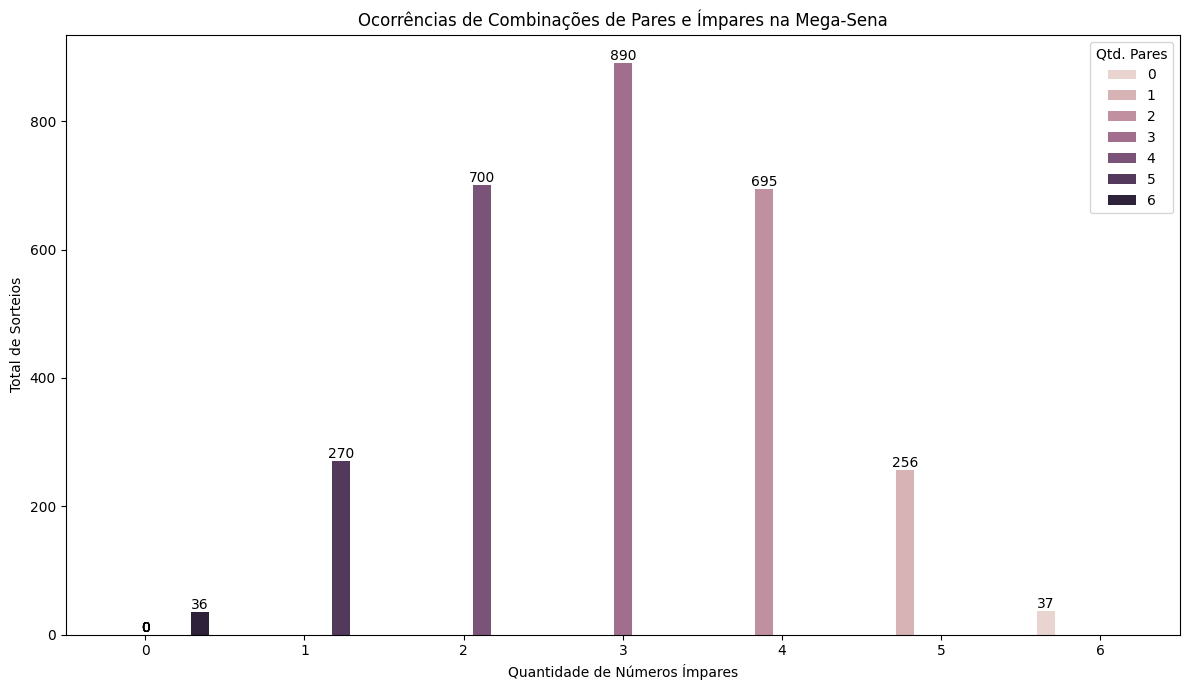

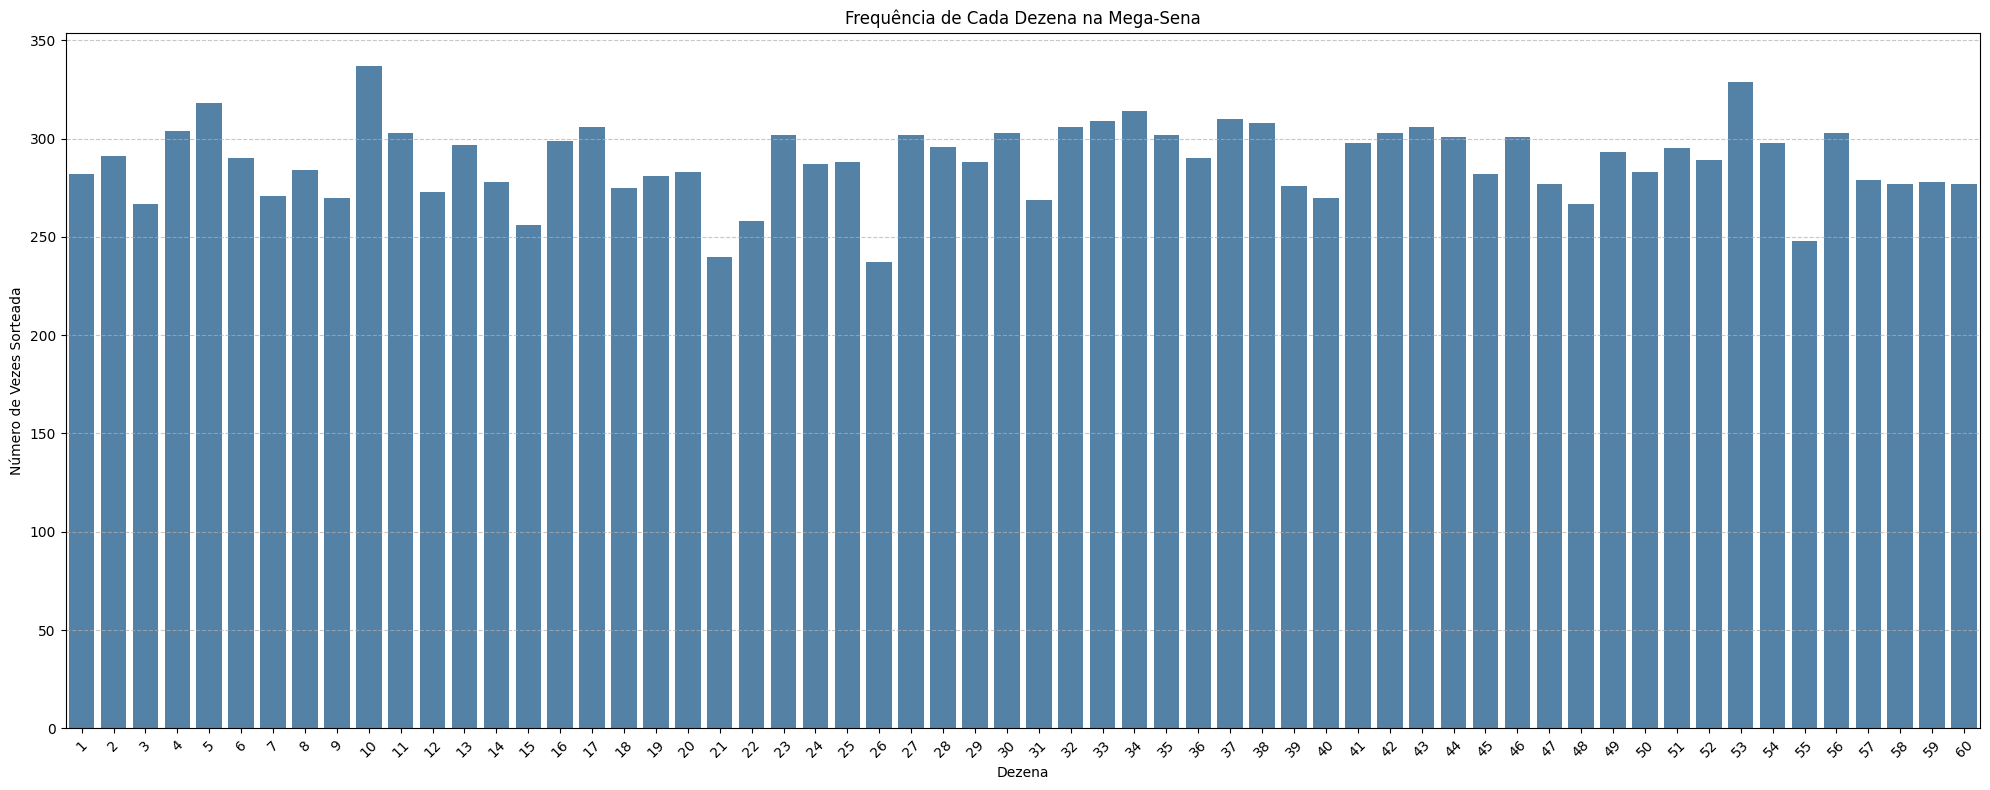

In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # 1. Carregar os dados do arquivo JSON
    with open('/content/sorteios_mega_sena.json', 'r') as f:
        dados_json = json.load(f)

    # 2. Criar o DataFrame. As colunas já são as dezenas.
    df = pd.DataFrame(dados_json, columns=[0, 1, 2, 3, 4, 5])

    # 3. ANÁLISE DE PARES E ÍMPARES
    # Contar quantos números são pares em cada linha (sorteio)
    df['pares'] = df.apply(lambda row: sum(n % 2 == 0 for n in row), axis=1)
    # A quantidade de ímpares é simplesmente 6 - (número de pares)
    df['impares'] = 6 - df['pares']

    # Agrupar e contar as ocorrências de cada combinação
    combinacao_counts = df.groupby(['pares', 'impares']).size().reset_index(name='ocorrencias').sort_values(by='ocorrencias', ascending=False)

    print("--- Análise de Combinações Pares e Ímpares ---")
    print("As combinações que mais ocorreram foram:")
    print(combinacao_counts)

    # Gerar o gráfico de combinações
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(data=combinacao_counts, x='impares', y='ocorrencias', hue='pares', dodge=True)
    plt.title('Ocorrências de Combinações de Pares e Ímpares na Mega-Sena')
    plt.xlabel('Quantidade de Números Ímpares')
    plt.ylabel('Total de Sorteios')
    plt.legend(title='Qtd. Pares')
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.tight_layout()
    plt.savefig('combinacao_pares_impares.png')
    print("\n> Gráfico 'combinacao_pares_impares.png' salvo com sucesso.")

    # 4. ANÁLISE DE FREQUÊNCIA DE CADA NÚMERO
    # Juntar todas as dezenas de todos os sorteios em uma única lista
    todas_as_dezenas = pd.Series(df[[0, 1, 2, 3, 4, 5]].values.ravel())

    # Contar a frequência de cada número
    frequencia_numeros = todas_as_dezenas.value_counts().sort_index()

    print("\n--- Frequência de Sorteio de Cada Número (1 a 60) ---")
    print(frequencia_numeros)

    # Gerar o gráfico de frequência
    plt.figure(figsize=(20, 8))
    sns.barplot(x=frequencia_numeros.index, y=frequencia_numeros.values, color='steelblue')
    plt.title('Frequência de Cada Dezena na Mega-Sena')
    plt.xlabel('Dezena')
    plt.ylabel('Número de Vezes Sorteada')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('frequencia_numeros.png')
    print("\n> Gráfico 'frequencia_numeros.png' salvo com sucesso.")


except Exception as e:
    print(f"Ocorreu um erro inesperado durante a análise: {e}")

--- Distribuição por Linha ---
dezena
1    2914
2    2851
3    2801
4    2954
5    2911
6    2873
Name: count, dtype: int64

> Gráfico 'distribuicao_linhas.png' salvo.

--- Distribuição por Coluna ---
dezena
1     1687
2     1720
3     1810
4     1782
5     1694
6     1720
7     1745
8     1707
9     1686
10    1753
Name: count, dtype: int64


/tmp/ipython-input-7-793154560.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=linhas.index, y=linhas.values, palette='viridis')
/tmp/ipython-input-7-793154560.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=colunas.index, y=colunas.values, palette='plasma')



> Gráfico 'distribuicao_colunas.png' salvo.

--- Distribuição por Quadrante ---
dezena
Q1 (Sup. Esquerdo)    4244
Q2 (Sup. Direito)     4322
Q3 (Inf. Esquerdo)    4449
Q4 (Inf. Direito)     4289
Name: count, dtype: int64

> Gráfico 'distribuicao_quadrantes.png' salvo.


/tmp/ipython-input-7-793154560.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quadrantes.index, y=quadrantes.values, palette='magma')


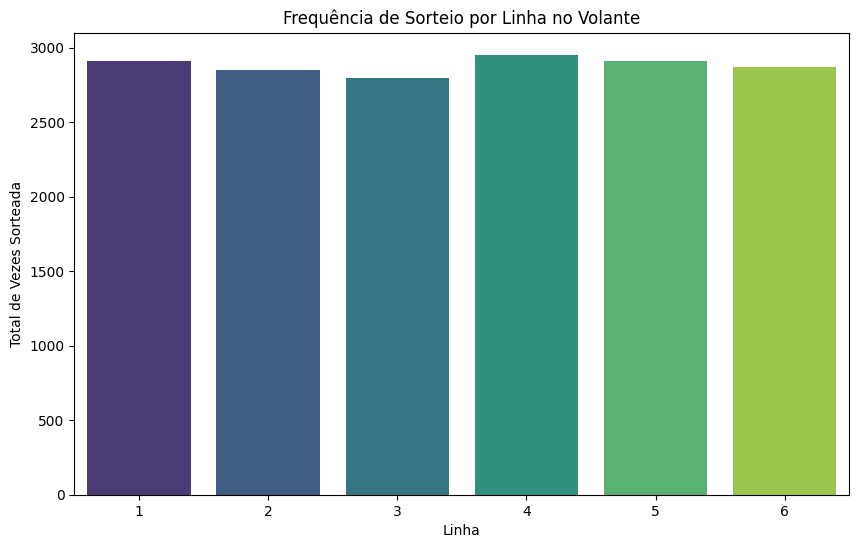

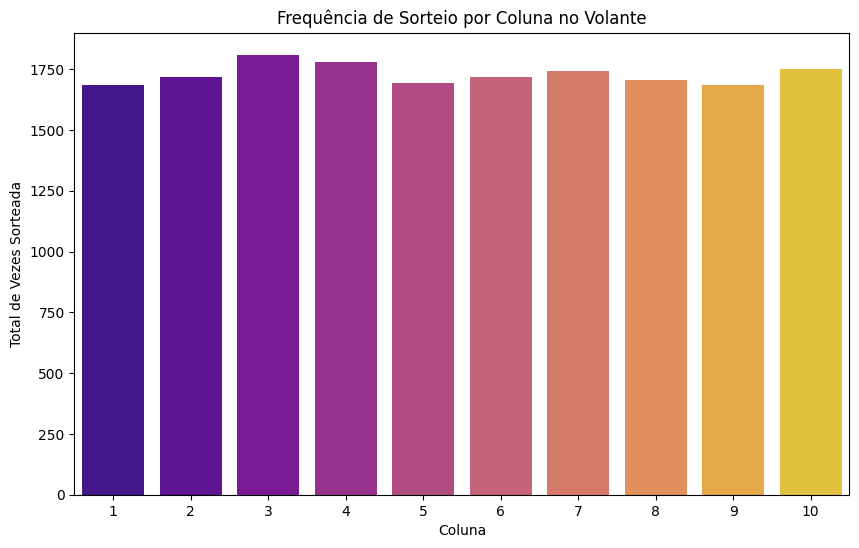

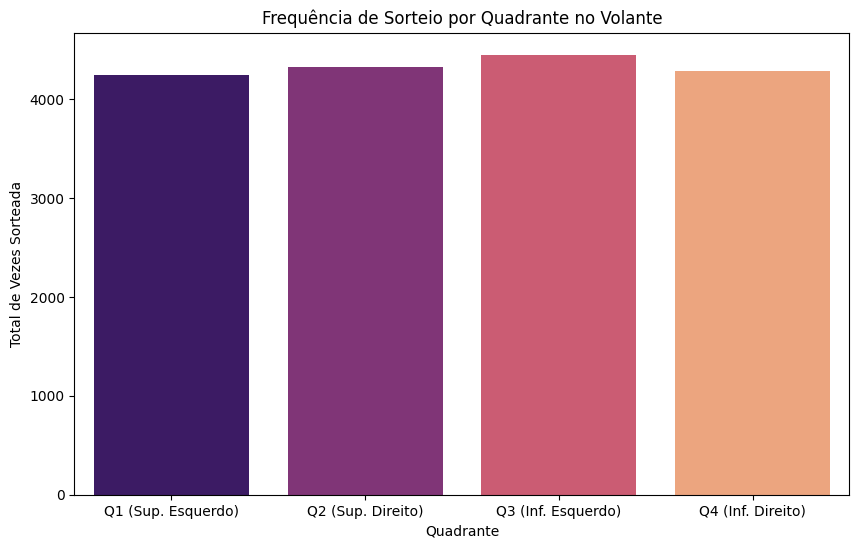

In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definições do volante da Mega-Sena
# Linhas: 1 (1-10), 2 (11-20), ..., 6 (51-60)
# Colunas: 1 (1,11,21..), 2 (2,12,22..), ..., 10 (10,20,30..)
# Quadrantes: 4 quadrantes de 3x5 dezenas
# Q1: Linhas 1-3, Colunas 1-5 (1-5, 11-15, 21-25)
# Q2: Linhas 1-3, Colunas 6-10 (6-10, 16-20, 26-30)
# Q3: Linhas 4-6, Colunas 1-5 (31-35, 41-45, 51-55)
# Q4: Linhas 4-6, Colunas 6-10 (36-40, 46-50, 56-60)

def get_linha(n):
    return (n - 1) // 10 + 1

def get_coluna(n):
    return (n - 1) % 10 + 1

def get_quadrante(n):
    linha = get_linha(n)
    coluna = get_coluna(n)
    if linha <= 3 and coluna <= 5:
        return 'Q1 (Sup. Esquerdo)'
    elif linha <= 3 and coluna > 5:
        return 'Q2 (Sup. Direito)'
    elif linha > 3 and coluna <= 5:
        return 'Q3 (Inf. Esquerdo)'
    else:
        return 'Q4 (Inf. Direito)'

try:
    # Carregar os dados do arquivo JSON
    with open('/content/sorteios_mega_sena.json', 'r') as f:
        dados_json = json.load(f)

    # Criar DataFrame e transformar em uma lista longa de dezenas
    df = pd.DataFrame(dados_json)
    todas_as_dezenas = pd.Series(df.values.ravel(), name='dezena')

    # --- Análise por Linha ---
    linhas = todas_as_dezenas.apply(get_linha).value_counts().sort_index()
    print("--- Distribuição por Linha ---")
    print(linhas)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=linhas.index, y=linhas.values, palette='viridis')
    plt.title('Frequência de Sorteio por Linha no Volante')
    plt.xlabel('Linha')
    plt.ylabel('Total de Vezes Sorteada')
    plt.savefig('distribuicao_linhas.png')
    print("\n> Gráfico 'distribuicao_linhas.png' salvo.")

    # --- Análise por Coluna ---
    colunas = todas_as_dezenas.apply(get_coluna).value_counts().sort_index()
    print("\n--- Distribuição por Coluna ---")
    print(colunas)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=colunas.index, y=colunas.values, palette='plasma')
    plt.title('Frequência de Sorteio por Coluna no Volante')
    plt.xlabel('Coluna')
    plt.ylabel('Total de Vezes Sorteada')
    plt.savefig('distribuicao_colunas.png')
    print("\n> Gráfico 'distribuicao_colunas.png' salvo.")

    # --- Análise por Quadrante ---
    quadrantes = todas_as_dezenas.apply(get_quadrante).value_counts().sort_index()
    print("\n--- Distribuição por Quadrante ---")
    print(quadrantes)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=quadrantes.index, y=quadrantes.values, palette='magma')
    plt.title('Frequência de Sorteio por Quadrante no Volante')
    plt.xlabel('Quadrante')
    plt.ylabel('Total de Vezes Sorteada')
    plt.savefig('distribuicao_quadrantes.png')
    print("\n> Gráfico 'distribuicao_quadrantes.png' salvo.")

except FileNotFoundError:
    print("\nERRO: Arquivo '/content/sorteios_mega_sena.json' não encontrado.")
    print("Por favor, faça o upload do arquivo para o ambiente Colab e execute o código novamente.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")